In [1]:
using Pkg, Images, TestImages, CoordinateTransformations, Rotations, LinearAlgebra, Interpolations, SparseArrays
using BenchmarkTools, FFTW, Plots
#Pkg.activate("//Users/jiyong/External/GPUserver/development/Project/nTomo")
Pkg.activate("/home/jiyong/development/Project/nTomo.jl")
using nTomo
# include("sart2.jl")

  Activating project at `~/development/Project/nTomo.jl`


# Iterative Method

$N = n \times n$ image cell 과 $M$ 개의 검출 위치로 이루어진 평면 tomography system 을 생각하자. 예를 들어 $N_d$ 개의 pixel 로 이루어진 검출기를 사용하여 $N_\theta$ 개의 각도에서 측정했다고 하고, 이 이미지를 $n \times n$ 이미지로 reconstruction 한다고 하면, $n=N_d$, $N = N_d \times N_d$, $M = N_d \times N_\theta$ 가 된다. 이 시스템이 $\boldsymbol{A}=\mathcal{M}_{M \times N}(\mathbb{R})$, $\boldsymbol{x}\in \mathcal{M}_{N}(\mathbb{R})$, $\boldsymbol{d} = \mathcal{M}_M(\mathbb{R})$ 에 대해

$$
\boldsymbol{Ax}=\boldsymbol{d}
$$

를 만족하는 $\boldsymbol{x}$ 를 찾는 것이 된다.

</br>

## ART (Algebraic reconstruction technique)

$$
\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \lambda_m \dfrac{1}{\boldsymbol{A}_{1:}^T \boldsymbol{A}_{1:}} (\boldsymbol{b}_i - \boldsymbol{A}_{i:}\boldsymbol{x}^{(k)}) \boldsymbol{A}_{i:}
$$


</br>

## SART (Simultaneous ART)

$$
\boldsymbol{x}^{(k+1)} = \boldsymbol{x}^{(k)} + \lambda_m \boldsymbol{V}^{-1} \boldsymbol{A}^T \boldsymbol{W} (\boldsymbol{b}-\boldsymbol{Ax}^{(k)}) 
$$

이 때 $\boldsymbol{V}$ 와 $\boldsymbol{W}$ 는 대각행렬로 각각의 대각성분은 다음과 같다.

$$
\boldsymbol{V}_{jj} = \sum_{i=1}^M |\boldsymbol{A}_{ij}|, \qquad \boldsymbol{W}_{ii} = \dfrac{1}{\sum_{j=1}^N |\boldsymbol{A}_{ij}|}
$$





- 가장 유명한 팬텀인 Shepp-logan phantom 을 사용하여 image reconstruction 을 테스트해본다. 아래의 `phantom_shepp_logan` 함수는 `Images.jl` 에서 제공하는 팬텀을 약간 변형시킨 것이다.


(356, 356)


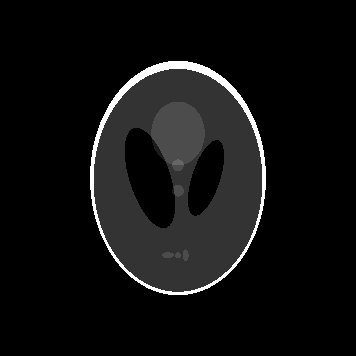

In [11]:
img = phantom_shepp_logan(256, 50)
println(size(img))
c=((size(img)[1])>>1)+10
mat2gray(img)


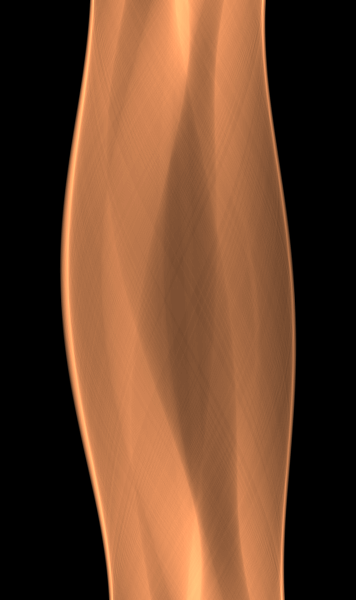

In [12]:
ths = 0:0.3:179.9
sino1 = radon(img, ths, (c, c));
colorize(sino1, :copper)
# write("testsino.bin", sino1)

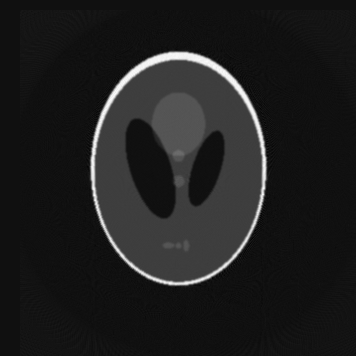

In [13]:



rec1=iradon_fbp(sino1, Array(ths), c, "hann")
# rec1[rec1.<0].=0.0f0
mat2gray(rec1)

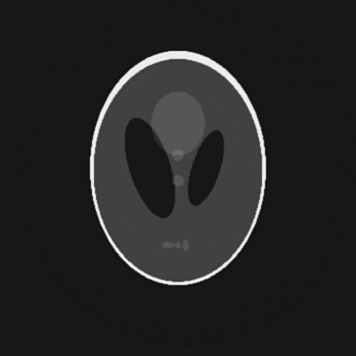

In [14]:
q=iradon_sart(sino1, ths, image=nothing, center = c)
pp = mat2gray(q)

# heatmap(q, aspect_ratio=:equal)

In [ ]:
@btime filtered_back_projection(sino1, ths, c, "hann")
@btime iradon_sart(sino1, ths, image=nothing, center = c)

In [ ]:
xx = [10, -30, 20, 50 , 0]
findmin(xx)

In [ ]:
extrema(r3[5, :])

In [ ]:
xx

In [ ]:
cc = Array{Int64}([])

In [ ]:
append!(cc, 3)

In [ ]:
function _rotimg(img::Matrix{T}, θ, c=Union{Real, Nothing}=nothing) where T<:AbstractFloat
    m, n = size(img)
    if c === nothing
        img_center = (m>>1, n>>1)
    else 
        img_center = (c[1], c[2])
    end
    θ = θ/180.0*π
    mv, Mv = extrema(img)
    timg = Gray.((img.-mv)/(Mv-mv))
    trfm = recenter(RotMatrix(θ), img_center)
    img1 = warp(timg, inv(trfm), method=BSpline(Linear()), fillvalue = Flat(), axes(timg))
    result = Float32.(img1[1:m, 1:n]).*(Mv-mv) .+ mv
    return result
end

In [ ]:
pp2([1.0f0 2; 3 4], 10.0, (3, 4))

In [ ]:
a=(1.0, 2.0)

In [ ]:
γ = (2.0/(√5-1))^2
interval = 180.0/γ
θs = 1:0.5:179.9
for θ in θs
    
    
end

In [ ]:
c

In [ ]:
ths isa AbstractVector{<:Real}